In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/19_Bagging/diabetes.csv")
#df.to_csv("diabetes.csv", index=False)
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


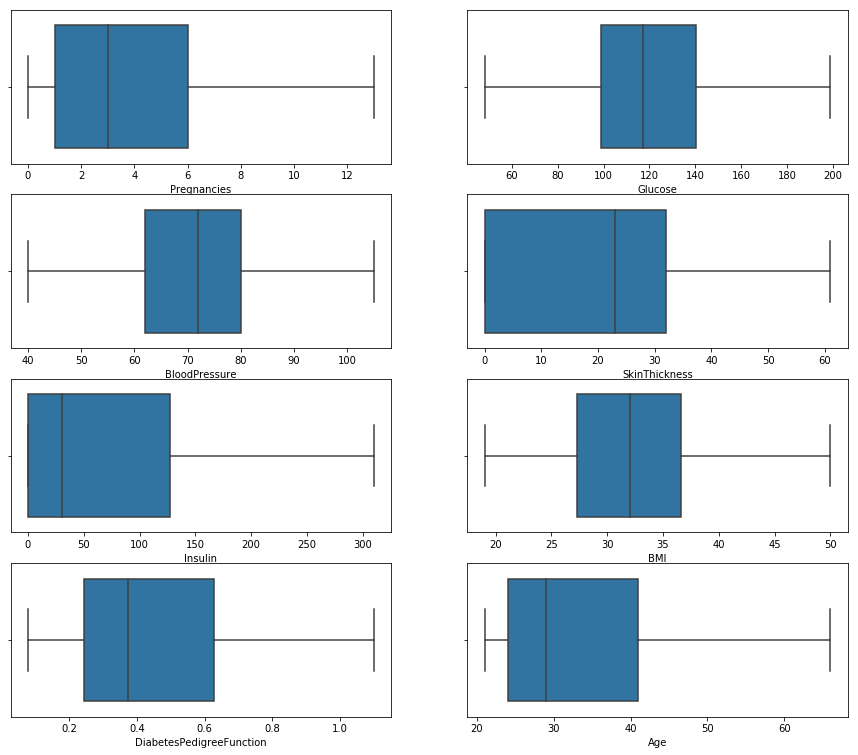

In [42]:
figure, axs = plt.subplots(nrows=4,ncols=2,figsize=(15,13))
sns.boxplot(x=df["Pregnancies"], ax=axs[0,0])
sns.boxplot(x=df["Glucose"], ax=axs[0,1])
sns.boxplot(x=df["BloodPressure"], ax=axs[1,0])
sns.boxplot(x=df["SkinThickness"], ax=axs[1,1])
sns.boxplot(x=df["Insulin"], ax=axs[2,0])
sns.boxplot(x=df["BMI"], ax=axs[2,1])
sns.boxplot(x=df["DiabetesPedigreeFunction"], ax=axs[3,0])
sns.boxplot(x=df["Age"], ax=axs[3,1])

In [41]:
df["Pregnancies"] = df["Pregnancies"].apply(lambda x: 13 if x>13 else x)
df["BloodPressure"] = df["BloodPressure"].apply(lambda x: 105 if x>105 else (40 if x<40 else x))
df["Glucose"] = df["Glucose"].apply(lambda x: 48 if x<48 else x)
df["SkinThickness"] = df["SkinThickness"].apply(lambda x: 61 if x>61 else x)
df["Insulin"] = df["Insulin"].apply(lambda x: 310 if x>310 else x)
df["BMI"] = df["BMI"].apply(lambda x: 50 if x>50 else (19 if x<19 else x))
df["DiabetesPedigreeFunction"] = df["DiabetesPedigreeFunction"].apply(lambda x: 1.1 if x>1.1 else x)
df["Age"] = df["Age"].apply(lambda x: 66 if x>66 else x)
                                    

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.834635,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.336808,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [44]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0]

/Users/hamza/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/hamza/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([ 0.64935582,  0.86480681,  0.08034844,  0.92167098, -0.79174769,
        0.20418907,  0.63057148,  1.44827368])

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeClassifier(), X,y, cv=5)
scores

array([0.71428571, 0.64285714, 0.72727273, 0.79738562, 0.70588235])

In [53]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier( base_estimator=DecisionTreeClassifier(),
                             n_estimators=100,
                             max_samples=0.8,
                             oob_score=True,
                             random_state=9)
bag_model.fit(X_train,y_train)
bag_model.oob_score_

0.7638436482084691

In [54]:
from sklearn.ensemble import BaggingClassifier

bag_model2 = BaggingClassifier( base_estimator=DecisionTreeClassifier(),
                             n_estimators=100,
                             max_samples=0.8,
                             oob_score=True,
                             random_state=9)
scores = cross_val_score(bag_model2, X, y, cv=5)
scores.mean()

0.7579067990832697